In [1]:
import json
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
sns.set_style("white")

In [2]:
# Folders of interest
base_dir='localdb'
folders_of_interest = ['climate', 'math', 'misinformation_health','gwarming']
emotions = ['anger', 'trust', 'surprise', 'disgust', 'joy', 'sadness', 'fear', 'anticipation']

In [3]:
output = []

In [4]:
def extract_model(filename):
    if filename.endswith('.jsonl'):
        return filename[:-6]  # Remove the last 6 characters
    else:
        return filename

In [5]:
#Consider all topics
for folder in folders_of_interest:
    folder_path = os.path.join(base_dir, folder)

    #Consider all models
    #Loops over each model
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r') as file:

            zscores = {}

            for line in file:
                line = json.loads(line)
                   
                for emotion in line['zscores'].keys():
                    if emotion not in zscores:
                        zscores[emotion] = []
                    zscores[emotion].append(line['zscores'][emotion])

            for emotion in zscores.keys():
                pos_count = len([num for num in zscores[emotion] if num > 1.96])
                neg_count = len([num for num in zscores[emotion] if num < -1.96])
                output.append({'topic': folder, 'model': extract_model(filename), 'emotion': emotion, 'positive': pos_count, 'negative': neg_count})

In [6]:
print(output)

[{'topic': 'climate', 'model': 'GPT-3.5(ITA)', 'emotion': 'anger', 'positive': 0, 'negative': 37}, {'topic': 'climate', 'model': 'GPT-3.5(ITA)', 'emotion': 'trust', 'positive': 508, 'negative': 0}, {'topic': 'climate', 'model': 'GPT-3.5(ITA)', 'emotion': 'surprise', 'positive': 70, 'negative': 0}, {'topic': 'climate', 'model': 'GPT-3.5(ITA)', 'emotion': 'disgust', 'positive': 1, 'negative': 137}, {'topic': 'climate', 'model': 'GPT-3.5(ITA)', 'emotion': 'joy', 'positive': 4, 'negative': 8}, {'topic': 'climate', 'model': 'GPT-3.5(ITA)', 'emotion': 'sadness', 'positive': 0, 'negative': 26}, {'topic': 'climate', 'model': 'GPT-3.5(ITA)', 'emotion': 'fear', 'positive': 11, 'negative': 7}, {'topic': 'climate', 'model': 'GPT-3.5(ITA)', 'emotion': 'anticipation', 'positive': 38, 'negative': 0}, {'topic': 'climate', 'model': 'GPT-3.5', 'emotion': 'anger', 'positive': 0, 'negative': 127}, {'topic': 'climate', 'model': 'GPT-3.5', 'emotion': 'trust', 'positive': 596, 'negative': 0}, {'topic': 'clim

In [7]:
df = pd.DataFrame(output)
display(df)

,topic,model,emotion,positive,negative
0,climate,GPT-3.5(ITA),anger,0,37
1,climate,GPT-3.5(ITA),trust,508,0
2,climate,GPT-3.5(ITA),surprise,70,0
3,climate,GPT-3.5(ITA),disgust,1,137
4,climate,GPT-3.5(ITA),joy,4,8
...,...,...,...,...,...
347,gwarming,mistral-7b,disgust,0,235
348,gwarming,mistral-7b,joy,17,3
349,gwarming,mistral-7b,sadness,0,145
350,gwarming,mistral-7b,fear,20,24


In [8]:
df['model'].unique()

array(['GPT-3.5(ITA)', 'GPT-3.5', 'GPT-4o(ITA)', 'GPT-4o', 'Haiku(ITA)',
       'Haiku', 'Llama-3-8B', 'Llama-3.1-70B(ITA)', 'Llama-3.1-70B',
       'LLaMAntino-2(ITA)', 'Mistral-7b', 'mistral-7b'], dtype=object)

In [9]:
model_order = [
    'GPT-3.5',
    'GPT-3.5(ITA)',
    'GPT-4o',
    'GPT-4o(ITA)',
    'Haiku',
    'Haiku(ITA)',
    'Mistral-7b',
    'Llama-3-8B',
    'Llama-3.1-70B',
    'Llama-3.1-70B(ITA)',
    'LLaMAntino-2(ITA)'
]

# Create a dictionary for sorting
sorter = {model: i for i, model in enumerate(model_order)}

# Define a function to map the models to their sort order
def model_sort_order(model):
    return sorter.get(model, len(sorter))

# Sort the DataFrame
df = df.sort_values(by='model', key=lambda x: x.map(model_sort_order))


In [10]:
#df.to_csv('emotionspresence.csv', index=False)


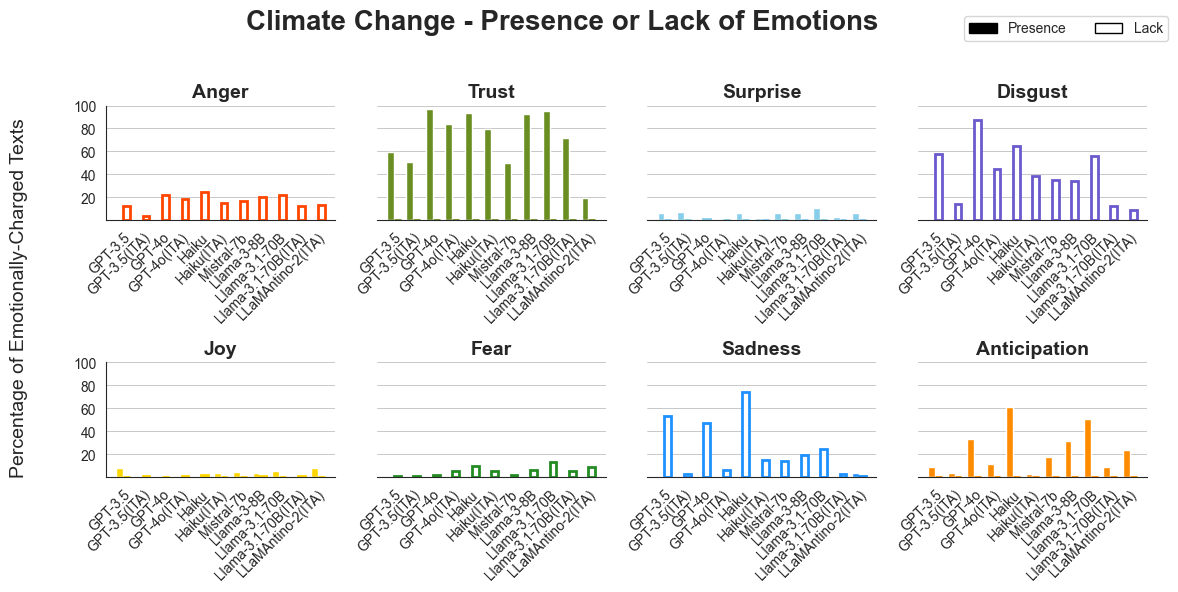

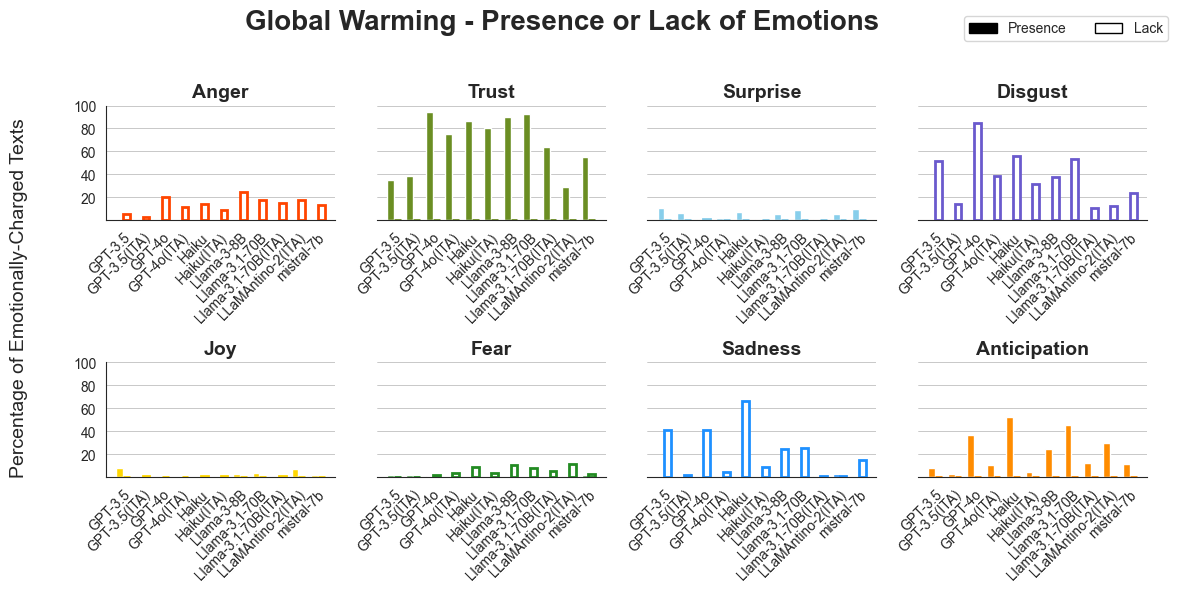

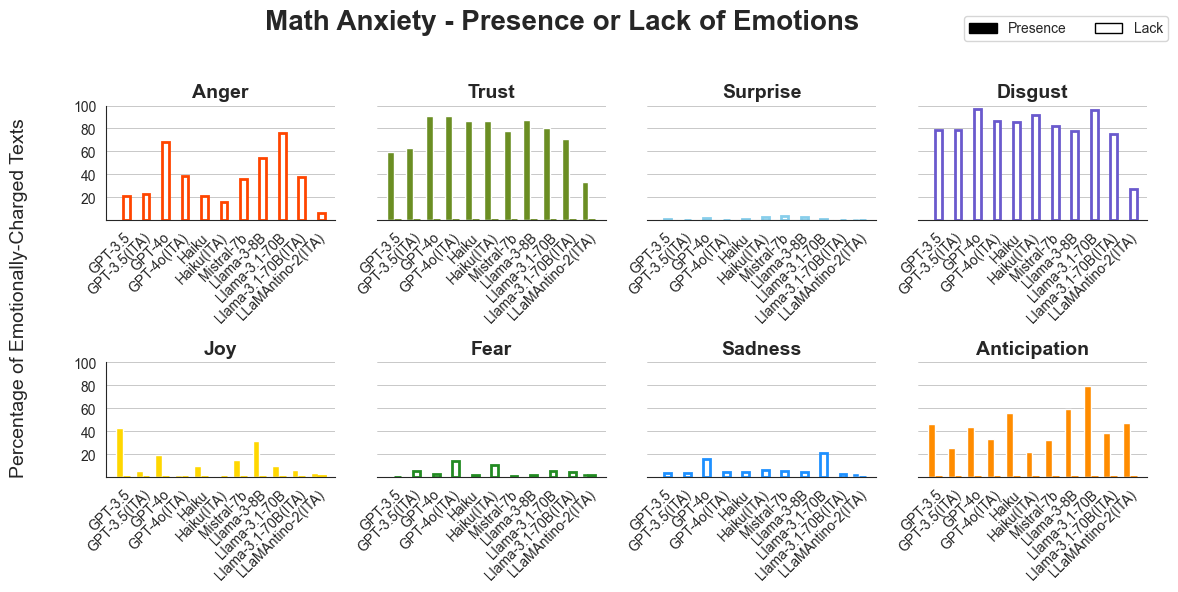

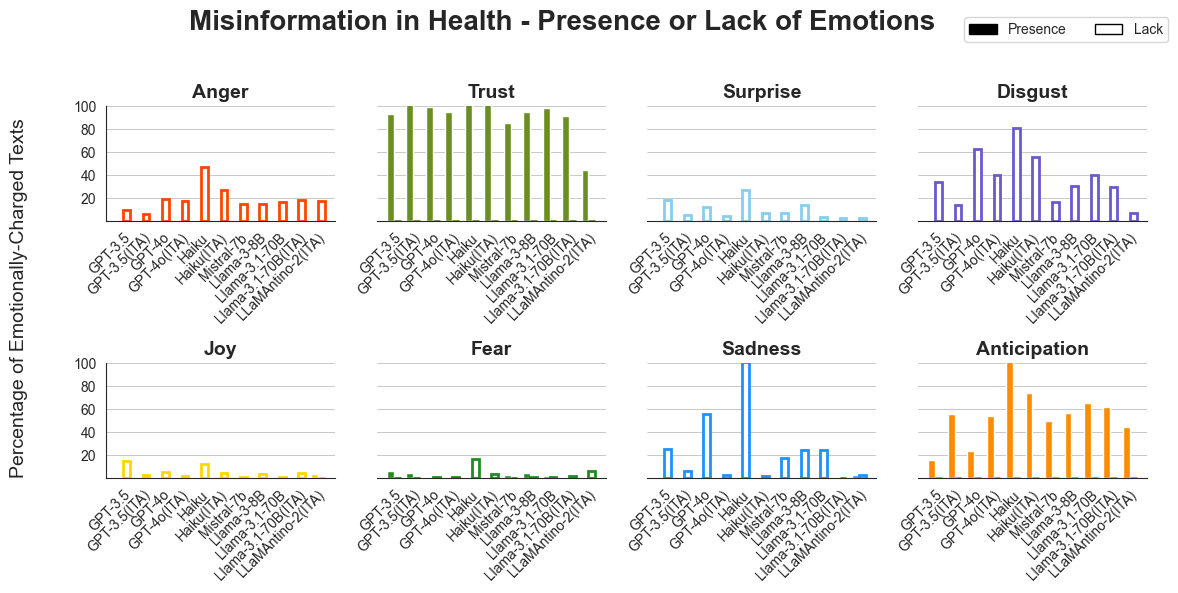

In [11]:
# Define your color mapping and topic titles
colors = {
    'anger': 'orangered',
    'trust': 'olivedrab',
    'surprise': 'skyblue',
    'disgust': 'slateblue',
    'joy': 'gold',
    'fear': 'forestgreen',
    'sadness': 'dodgerblue',
    'anticipation': 'darkorange'
}

topic_titles = {
    'climate': 'Climate Change',
    'gwarming': 'Global Warming',
    'math': 'Math Anxiety',
    'misinformation_health': 'Misinformation in Health'
}

# Iterate over each topic
for topic in topic_titles.keys():
    topic_data = df[df['topic'] == topic]

    # Create a 2x4 grid of subplots
    fig, axs = plt.subplots(2, 4, figsize=(12, 6), sharey=True)
    fig.suptitle(f'{topic_titles[topic]} - Presence or Lack of Emotions', fontsize=20, ha='center', fontweight='bold')

    # Iterate over each emotion and its corresponding subplot
    for i, emotion in enumerate(colors.keys()):
        row = i // 4
        col = i % 4
        ax = axs[row, col]

        emotion_data = topic_data[topic_data['emotion'] == emotion]
        models = emotion_data['model'].unique()

        bar_width = 0.35
        r1 = np.arange(len(models))
        r2 = r1 + bar_width

        # Plotting the positive bars
        ax.bar(r1, emotion_data['positive'] / 10, width=bar_width, color=colors[emotion], label='Presence')

        # Plotting the negative bars with white fill and colored edges
        ax.bar(r2, emotion_data['negative'] / 10, width=bar_width, color='white', edgecolor=colors[emotion], linewidth=2, label='Lack')

        # Setting the x-ticks and labels
        ax.set_xticks(r1 + bar_width / 2 + 0.5)
        ax.set_xticklabels(models, rotation=45, ha='right')
        ax.set_title(emotion.capitalize(), fontsize=14, fontweight='bold')

        # Hide y-axis labels for all but the first column
        if col != 0:
            ax.tick_params(labelleft=False)
            ax.spines['left'].set_visible(False)

        ax.set_ylim(0, 100)
        ax.yaxis.grid(True, which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.3)
        ax.set_yticks([20, 40, 60, 80, 100])

        # Hide unnecessary spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Add a shared y-axis label
    fig.text(0.04, 0.5, 'Percentage of Emotionally-Charged Texts', va='center', rotation='vertical', fontsize=14)

    # Adjust layout and add legend
    fig.tight_layout(rect=[0.08, 0, 1, 0.95])
    legend_elements = [Patch(facecolor='black', edgecolor='black', label='Presence'),
                       Patch(facecolor='white', edgecolor='black', label='Lack')]

    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.92, 0.98), ncol=2)

    plt.show()